In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def func(x):
    
    if x >= 0:
        return (2/3)*(x**(3/2))
    else:
        return (2/3)*((-x)**(3/2))
    
def grad(x):
    
    if x>=0:
        return np.sqrt(x)
    else:
        return np.sqrt(-x)

In [29]:
def gradient_desc(x_initial,lr,T):
    
    x=x_initial
    data_record =[]
    
    for t in range(T):
        
       
        data_record.append((x, func(x)))
        if x>=0:
            x = x - lr*np.sqrt(x)
        else:
            x = x + lr*np.sqrt(-x)
#             x -= learning_rate * derivative(x)
        
        
    return data_record




In [30]:
# we will initialize x in 2 ways -- one from a predefine set and other will be randomly from a continuous distribution

def initialize_starting_point(lr,use_list):
    S = [0, lr**2, -1*(lr**2),(3+np.sqrt(5))/2 *(lr**2),-1*(3+np.sqrt(5))/2 *(lr**2)]  # as mentioned in paper
    
    if use_list:  # use_list will either be true or false depending on choice of initialization
        return np.random.choice(S)

    else:
        return np.random.uniform(-3, 3)

In [53]:
learning_rates = [1e-3,1e-2,1e-1]
T = 250 # number of iteration

# we need to define starting points
# first, we start by initializing x from a random continuous distribution
# setting initial parameters first from random distribution

#hist = gradient_desc(x0,learning_rates[2],T)

full_record = {}  # dictionary so that I can track values at different iterations
for rate in learning_rates:
    x0 = initialize_starting_point(rate,use_list = True)   # initial value of x changes with rate when choosing from pre-defined list
    full_record[rate] = gradient_desc(x0,rate,T)
    
    

[6.66666667e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

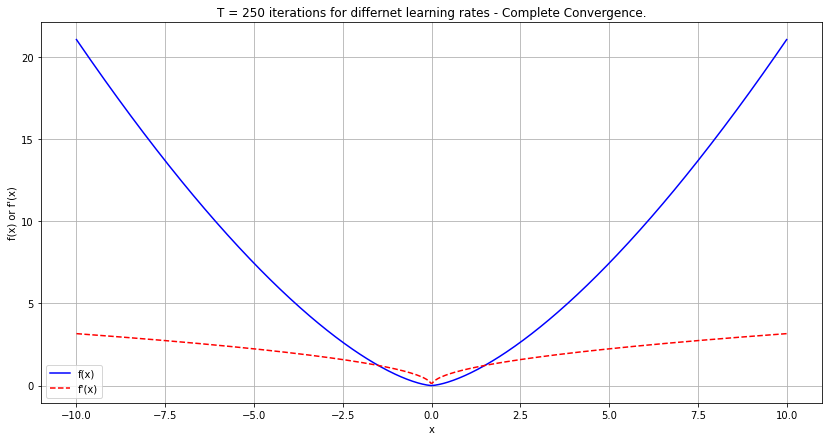

In [59]:
x_values = np.linspace(-10, 10, 500)  # random values keeping in mine range of x provided
f_values = np.array([func(x) for x in x_values])  # plotting function
df_values = np.array([grad(x) for x in x_values])  # plotting function derivative

plt.figure(figsize=(14, 7))

        
plt.plot(x_values, f_values, label='f(x)', color='blue')
# Plot the derivative f'(x)
plt.plot(x_values, df_values, label="f'(x)", color='red', linestyle='--')        
# hist=np.array(hist)
#plt.scatter(hist[:, 0], hist[:, 1], color='green',s=10) 

# Plot gradient descent paths for each learning rate
colors = ['green', 'orange', 'purple']
for i, (rate, data_record) in enumerate(full_record.items()):
    data_record = np.array(data_record)
    print(data_record[:, 1])
    plt.scatter(data_record[:, 0], data_record[:, 1], color=colors[i], label=f'lr={rate}', s=10) 
    

plt.xlabel('x')
plt.ylabel('f(x) or f\'(x)')
plt.title('T = 250 iterations for differnet learning rates - Complete Convergence.')
#plt.title('Function f(x) and its derivative f\'(x)')
plt.legend()
plt.grid(True)
plt.show()